# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [140]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [96]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [97]:
#for debugging purposes only
# url = f"http://api.openweathermap.org/data/2.5/weather?lat={lats}&lon={lngs}&appid={weather_api_key}"
# cities = cities[0:60]
# len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [98]:
base_url = f"http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid={weather_api_key}"
city_url = f"{base_url}&q="

In [99]:
#give a counter to show the user how many cities are being processed
#try/except block when you call the response function because the city might not have data

lng_lat_city = []
#make a counter
counter = 0
group = 1

for city in cities:
    try:
        query_url = f"{base_url}&q={city}"
        response = requests.get(query_url).json()
        #empty dictionary and populate it with the keys
        #slow down response so that you do not exceed 60 requests per minute using time.sleep (look up documentation)
        city_dict = {}
        city_dict['city'] = response['name']
        city_dict['lon'] = response['coord']['lon']
        city_dict['lat'] = response['coord']['lat']
        city_dict['max_temp'] = response['main']['temp_max']
        city_dict['humidity'] = response['main']['humidity']
        city_dict['cloudiness'] = response['clouds']['all']
        city_dict['wind_speed'] = response['wind']['speed']
        city_dict['country'] = response['sys']['country']
        city_dict['date'] = response['dt']
        lng_lat_city.append(city_dict)
        counter += 1
        if counter == 40:
            group += 1
            time.sleep(60)
            counter = 0
        print(f'''
        Beginning Data Retrieval 
        =================================
        Processing city number {counter} in Group {group}| {city}
        ''')
    except:
        print("City not found. Skipping...")


        Beginning Data Retrieval 
        Processing city number 1 in Group 1| la ronge
        

        Beginning Data Retrieval 
        Processing city number 2 in Group 1| rabaul
        

        Beginning Data Retrieval 
        Processing city number 3 in Group 1| punta arenas
        

        Beginning Data Retrieval 
        Processing city number 4 in Group 1| east london
        

        Beginning Data Retrieval 
        Processing city number 5 in Group 1| torbay
        

        Beginning Data Retrieval 
        Processing city number 6 in Group 1| rikitea
        

        Beginning Data Retrieval 
        Processing city number 7 in Group 1| alta floresta
        

        Beginning Data Retrieval 
        Processing city number 8 in Group 1| kosh-agach
        

        Beginning Data Retrieval 
        Processing city number 9 in Group 1| kohlu
        

        Beginning Data Retrieval 
        Processing city number 10 in Group 1| nanakuli
        

        Begi

City not found. Skipping...

        Beginning Data Retrieval 
        Processing city number 19 in Group 2| yairipok
        

        Beginning Data Retrieval 
        Processing city number 20 in Group 2| kota kinabalu
        

        Beginning Data Retrieval 
        Processing city number 21 in Group 2| dikson
        

        Beginning Data Retrieval 
        Processing city number 22 in Group 2| paita
        

        Beginning Data Retrieval 
        Processing city number 23 in Group 2| lata
        

        Beginning Data Retrieval 
        Processing city number 24 in Group 2| vaini
        

        Beginning Data Retrieval 
        Processing city number 25 in Group 2| neyshabur
        

        Beginning Data Retrieval 
        Processing city number 26 in Group 2| pangnirtung
        

        Beginning Data Retrieval 
        Processing city number 27 in Group 2| cherskiy
        

        Beginning Data Retrieval 
        Processing city number 28 in Group 2| lin


        Beginning Data Retrieval 
        Processing city number 36 in Group 3| tikhvin
        

        Beginning Data Retrieval 
        Processing city number 37 in Group 3| abu dhabi
        

        Beginning Data Retrieval 
        Processing city number 38 in Group 3| kapaa
        

        Beginning Data Retrieval 
        Processing city number 39 in Group 3| kaitangata
        

        Beginning Data Retrieval 
        Processing city number 0 in Group 4| kodiak
        

        Beginning Data Retrieval 
        Processing city number 1 in Group 4| tokur
        

        Beginning Data Retrieval 
        Processing city number 2 in Group 4| puerto ayora
        

        Beginning Data Retrieval 
        Processing city number 3 in Group 4| bengkulu
        

        Beginning Data Retrieval 
        Processing city number 4 in Group 4| anadyr
        

        Beginning Data Retrieval 
        Processing city number 5 in Group 4| isangel
        

        Beginning Da


        Beginning Data Retrieval 
        Processing city number 14 in Group 5| mastic beach
        

        Beginning Data Retrieval 
        Processing city number 15 in Group 5| tasiilaq
        

        Beginning Data Retrieval 
        Processing city number 16 in Group 5| turukhansk
        

        Beginning Data Retrieval 
        Processing city number 17 in Group 5| gabu
        

        Beginning Data Retrieval 
        Processing city number 18 in Group 5| upata
        

        Beginning Data Retrieval 
        Processing city number 19 in Group 5| mahebourg
        

        Beginning Data Retrieval 
        Processing city number 20 in Group 5| touros
        

        Beginning Data Retrieval 
        Processing city number 21 in Group 5| visby
        

        Beginning Data Retrieval 
        Processing city number 22 in Group 5| naryan-mar
        

        Beginning Data Retrieval 
        Processing city number 23 in Group 5| noumea
        

        Beginn


        Beginning Data Retrieval 
        Processing city number 31 in Group 6| nikolskoye
        

        Beginning Data Retrieval 
        Processing city number 32 in Group 6| thompson
        

        Beginning Data Retrieval 
        Processing city number 33 in Group 6| meiktila
        

        Beginning Data Retrieval 
        Processing city number 34 in Group 6| norden
        

        Beginning Data Retrieval 
        Processing city number 35 in Group 6| sovetskiy
        
City not found. Skipping...

        Beginning Data Retrieval 
        Processing city number 36 in Group 6| barcelos
        

        Beginning Data Retrieval 
        Processing city number 37 in Group 6| port moresby
        

        Beginning Data Retrieval 
        Processing city number 38 in Group 6| partizanskoye
        

        Beginning Data Retrieval 
        Processing city number 39 in Group 6| provideniya
        

        Beginning Data Retrieval 
        Processing city number 0 


        Beginning Data Retrieval 
        Processing city number 8 in Group 8| flinders
        

        Beginning Data Retrieval 
        Processing city number 9 in Group 8| fengxian
        

        Beginning Data Retrieval 
        Processing city number 10 in Group 8| mocoa
        

        Beginning Data Retrieval 
        Processing city number 11 in Group 8| erdenet
        

        Beginning Data Retrieval 
        Processing city number 12 in Group 8| kavaratti
        

        Beginning Data Retrieval 
        Processing city number 13 in Group 8| saint-pierre
        

        Beginning Data Retrieval 
        Processing city number 14 in Group 8| deputatskiy
        

        Beginning Data Retrieval 
        Processing city number 15 in Group 8| jyvaskyla
        

        Beginning Data Retrieval 
        Processing city number 16 in Group 8| sur
        

        Beginning Data Retrieval 
        Processing city number 17 in Group 8| ahipara
        

        Begi


        Beginning Data Retrieval 
        Processing city number 25 in Group 9| antofagasta
        

        Beginning Data Retrieval 
        Processing city number 26 in Group 9| qiongshan
        

        Beginning Data Retrieval 
        Processing city number 27 in Group 9| pringsewu
        

        Beginning Data Retrieval 
        Processing city number 28 in Group 9| ostersund
        
City not found. Skipping...

        Beginning Data Retrieval 
        Processing city number 29 in Group 9| vostok
        

        Beginning Data Retrieval 
        Processing city number 30 in Group 9| omboue
        

        Beginning Data Retrieval 
        Processing city number 31 in Group 9| palauig
        

        Beginning Data Retrieval 
        Processing city number 32 in Group 9| asosa
        

        Beginning Data Retrieval 
        Processing city number 33 in Group 9| sao filipe
        

        Beginning Data Retrieval 
        Processing city number 34 in Group 9| 


        Beginning Data Retrieval 
        Processing city number 3 in Group 11| roma
        

        Beginning Data Retrieval 
        Processing city number 4 in Group 11| canutama
        
City not found. Skipping...

        Beginning Data Retrieval 
        Processing city number 5 in Group 11| changying
        

        Beginning Data Retrieval 
        Processing city number 6 in Group 11| beringovskiy
        
City not found. Skipping...
City not found. Skipping...

        Beginning Data Retrieval 
        Processing city number 7 in Group 11| barra do garcas
        

        Beginning Data Retrieval 
        Processing city number 8 in Group 11| svetlogorsk
        

        Beginning Data Retrieval 
        Processing city number 9 in Group 11| azogues
        

        Beginning Data Retrieval 
        Processing city number 10 in Group 11| edd
        

        Beginning Data Retrieval 
        Processing city number 11 in Group 11| mount darwin
        

        Begin


        Beginning Data Retrieval 
        Processing city number 20 in Group 12| fuling
        

        Beginning Data Retrieval 
        Processing city number 21 in Group 12| nokaneng
        
City not found. Skipping...

        Beginning Data Retrieval 
        Processing city number 22 in Group 12| laguna
        

        Beginning Data Retrieval 
        Processing city number 23 in Group 12| stephenville crossing
        

        Beginning Data Retrieval 
        Processing city number 24 in Group 12| altamont
        

        Beginning Data Retrieval 
        Processing city number 25 in Group 12| shitanjing
        

        Beginning Data Retrieval 
        Processing city number 26 in Group 12| proletariy
        

        Beginning Data Retrieval 
        Processing city number 27 in Group 12| caraubas
        

        Beginning Data Retrieval 
        Processing city number 28 in Group 12| alice springs
        

        Beginning Data Retrieval 
        Processing 


        Beginning Data Retrieval 
        Processing city number 37 in Group 13| indiaroba
        

        Beginning Data Retrieval 
        Processing city number 38 in Group 13| chancay
        

        Beginning Data Retrieval 
        Processing city number 39 in Group 13| nanpiao
        

        Beginning Data Retrieval 
        Processing city number 0 in Group 14| kalispell
        

        Beginning Data Retrieval 
        Processing city number 1 in Group 14| flin flon
        

        Beginning Data Retrieval 
        Processing city number 2 in Group 14| goderich
        

        Beginning Data Retrieval 
        Processing city number 3 in Group 14| westport
        

        Beginning Data Retrieval 
        Processing city number 4 in Group 14| inta
        

        Beginning Data Retrieval 
        Processing city number 5 in Group 14| kieta
        

        Beginning Data Retrieval 
        Processing city number 6 in Group 14| karachi
        

        Begin


        Beginning Data Retrieval 
        Processing city number 14 in Group 15| bom jesus
        

        Beginning Data Retrieval 
        Processing city number 15 in Group 15| contamana
        
City not found. Skipping...

        Beginning Data Retrieval 
        Processing city number 16 in Group 15| ginda
        

        Beginning Data Retrieval 
        Processing city number 17 in Group 15| grand-santi
        


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [141]:
lng_lat_city

# df_lng_lat = pd.DataFrame(lng_lat_city, columns=['City', 'Longitude', 'Latitude'])
df_lng_lat = pd.DataFrame(lng_lat_city)
df_lng_lat.head()

,city,lon,lat,max_temp,humidity,cloudiness,wind_speed,country,date
0,La Ronge,-105.2842,55.1001,66.20,22,100,5.75,CA,1620772637
1,Rabaul,152.1721,-4.1967,81.27,73,64,0.60,PG,1620772637
2,Punta Arenas,-70.9167,-53.1500,51.80,62,75,11.50,CL,1620772523
3,East London,27.9116,-33.0153,64.96,77,75,6.55,ZA,1620772638
4,Torbay,-52.7314,47.6666,48.00,87,90,8.05,CA,1620772638


In [86]:
df_lng_lat.to_csv('../output_data/lng_lat.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [142]:
df_lng_lat.head()

,city,lon,lat,max_temp,humidity,cloudiness,wind_speed,country,date
0,La Ronge,-105.2842,55.1001,66.20,22,100,5.75,CA,1620772637
1,Rabaul,152.1721,-4.1967,81.27,73,64,0.60,PG,1620772637
2,Punta Arenas,-70.9167,-53.1500,51.80,62,75,11.50,CL,1620772523
3,East London,27.9116,-33.0153,64.96,77,75,6.55,ZA,1620772638
4,Torbay,-52.7314,47.6666,48.00,87,90,8.05,CA,1620772638


In [143]:
df_lng_lat.describe()

,lon,lat,max_temp,humidity,cloudiness,wind_speed,date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,17.252362,20.034627,62.234835,70.384749,47.769497,7.081594,1.620773e+09
std,90.855733,33.464451,16.809347,21.457103,38.078828,4.935185,3.508445e+02
min,-175.200000,-54.800000,16.900000,5.000000,0.000000,0.070000,1.620772e+09
25%,-66.016700,-8.145000,50.000000,58.000000,6.000000,3.440000,1.620773e+09
50%,23.616700,23.565600,62.010000,75.000000,40.000000,5.770000,1.620773e+09
75%,98.910500,49.545300,77.000000,87.000000,87.000000,9.220000,1.620773e+09
max,179.316700,78.218600,98.130000,100.000000,100.000000,31.070000,1.620774e+09


In [118]:
#  Get the indices of cities that have humidity over 100%.
df_lat_lng = df_lng_lat[df_lng_lat['humidity'] > 100]
df_lat_lng
#NO CITIES HAVE HUMIDITY OVER 100

,city,lon,lat,max_temp,humidity,cloudiness,wind_speed,country,date


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


577

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

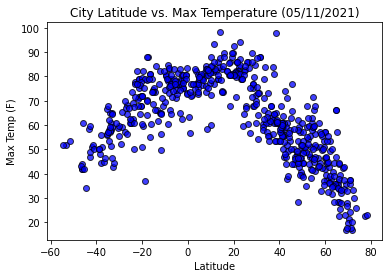

In [133]:
fig, ax = plt.subplots(figsize=(6,4))
x_axis = df_lng_lat.lat
y_axis = df_lng_lat['max_temp']
ax.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
ax.set_xlabel('Latitude');
ax.set_ylabel('Max Temp (F)');
ax.set_title("City Latitude vs. Max Temperature (05/11/2021)");

This plot is straightforward. It shows that near the equator, the max temperature is higher than further away from the equator. There is more land north of the equator. than south so the points are clustered toward higher latitudes. 

## Latitude vs. Humidity Plot

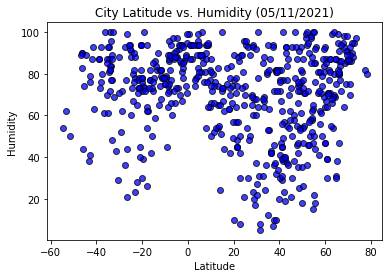

In [137]:
fig, ax = plt.subplots(figsize=(6,4))
x_axis = df_lng_lat.lat
y_axis = df_lng_lat['humidity']
ax.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
ax.set_xlabel('Latitude');
ax.set_ylabel('Humidity');
ax.set_title("City Latitude vs. Humidity (05/11/2021)");

Places near the equator are more clustered as having high humidity. North and south of the equator, a larger cluster of cities have high humidity but the trends have a wider spread between high and low humidity. 

## Latitude vs. Cloudiness Plot

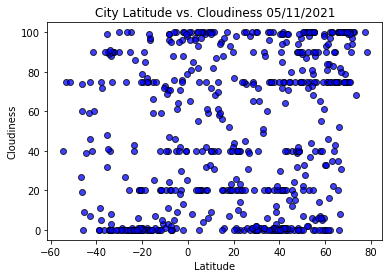

In [135]:
fig, ax = plt.subplots(figsize=(6,4))
x_axis = df_lng_lat.lat
y_axis = df_lng_lat['cloudiness']
ax.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
ax.set_xlabel('Latitude');
ax.set_ylabel('Cloudiness');
ax.set_title("City Latitude vs. Cloudiness 05/11/2021");

Cloudiness does not seem to have any relationship to latitude. The fact that many cities cluster on cloudiness (on the y-axis) is likely more due to a lack of precision in the standardization of measurement that groups different levels of cloudiness in the same way.

## Latitude vs. Wind Speed Plot

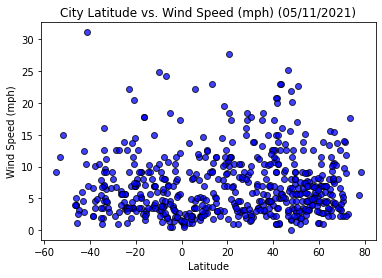

In [138]:
fig, ax = plt.subplots(figsize=(6,4))
x_axis = df_lng_lat.lat
y_axis = df_lng_lat['wind_speed']
ax.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
ax.set_xlabel('Latitude');
ax.set_ylabel('Wind Speed (mph)');
ax.set_title("City Latitude vs. Wind Speed (mph) (05/11/2021)");

Wind speed is generally low across the majority of cities surveyed. At the absolute lowest latitudes wind speed is higher but there are only a few points sampled so no definitive conclusions can be made. 

## Linear Regression

In [246]:
south_hemisphere = df_lng_lat[df_lng_lat['lat'] < 0]
len(south_hemisphere)
north_hemisphere = df_lng_lat[df_lng_lat['lat'] > 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [247]:
#Set Variables for North and South Max temp vs Latitude
x_axis1 = north_hemisphere['lat']
y_axis1 = north_hemisphere['max_temp']
x_axis2 = south_hemisphere['lat']
y_axis2 = south_hemisphere['max_temp']

In [250]:
#Linear regression Northern Hemisphere
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

#Linear regression Southern
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)
regress_values2 = x_axis2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

#testing rsquared
rvalue1 **2

0.722294194091453

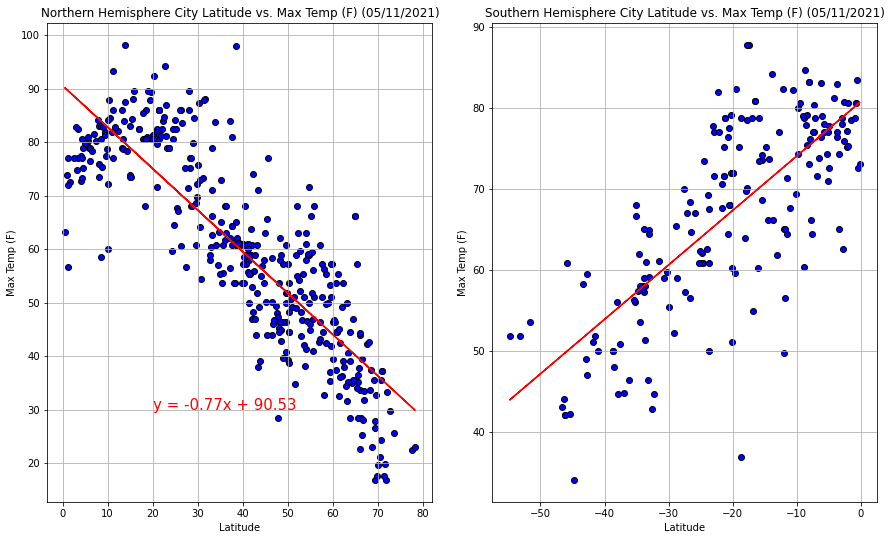

In [249]:
#Graph North and South Max temp versus latitude using multiple subplots
fig, (ax1, ax2) = plt.subplots(figsize = (13,8), nrows=1, ncols =2);
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")
ax2.scatter(x_axis2, y_axis2, marker="o", facecolors="blue", edgecolors="black")
fig.tight_layout(pad=4)

#Set Labels on graph
ax1.set_xlabel('Latitude');
ax1.set_ylabel('Max Temp (F)');
ax1.set_title("Northern Hemisphere City Latitude vs. Max Temp (F) (05/11/2021)");
ax2.set_xlabel('Latitude');
ax2.set_ylabel('Max Temp (F)');
ax2.set_title("Southern Hemisphere City Latitude vs. Max Temp (F) (05/11/2021)");


#Grid
ax1.grid()
ax2.grid()

#Line of best fit equation and plotting the line
ax1.annotate(line_eq1,(20,30),fontsize=15,color="red");
ax2.annotate(line_eq2, (-30,30), fontsize=15, color="red");
ax1.plot(x_axis1,regress_values1,"r-");
ax2.plot(x_axis2,regress_values2,"r-");

Latitude is correlated to max temperature. The models are slightly better for the northern hemisphere than the southern but that could also be because there are more points in the northern hemisphere.

####  Northern and Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [252]:
#Set Variables for North and South humidity vs Latitude
x_axis1 = north_hemisphere['lat']
y_axis1 = north_hemisphere['humidity']
x_axis2 = south_hemisphere['lat']
y_axis2 = south_hemisphere['humidity']

In [256]:
#Linear regression Northern Hemisphere
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

#Linear regression Southern
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)
regress_values2 = x_axis2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
rvalue2 **2

0.027276039315738014

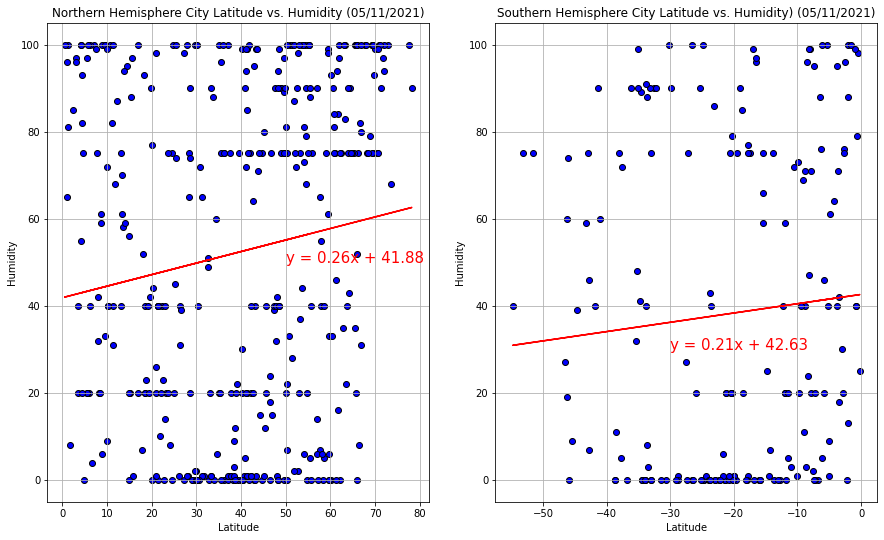

In [261]:
#Graph North and South humidity versus latitude using multiple subplots
fig, (ax1, ax2) = plt.subplots(figsize = (13,8), nrows=1, ncols =2);
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")
ax2.scatter(x_axis2, y_axis2, marker="o", facecolors="blue", edgecolors="black")
fig.tight_layout(pad=4)
ax1.set_xlabel('Latitude');
ax1.set_ylabel('Humidity');
ax1.set_title("Northern Hemisphere City Latitude vs. Humidity (05/11/2021)");
ax2.set_xlabel('Latitude');
ax2.set_ylabel('Humidity');
ax2.set_title("Southern Hemisphere City Latitude vs. Humidity) (05/11/2021)");
ax1.grid()
ax2.grid()
ax1.annotate(line_eq1,(50,50),fontsize=15,color="red");
ax2.annotate(line_eq2, (-30,30), fontsize=15, color="red");
ax1.plot(x_axis1,regress_values1,"r-");
ax2.plot(x_axis2,regress_values2,"r-");

Testing the Rsquared values for these charts, there is a low correlation between latitude and humidity. The rsquared values are not close to 1 and we can see that the spread of the data is not closely aligned with the lines of best fit.

####  Northern and Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [262]:
#Set Variables for North and South cloudiness vs Latitude
x_axis1 = north_hemisphere['lat']
y_axis1 = north_hemisphere['cloudiness']
x_axis2 = south_hemisphere['lat']
y_axis2 = south_hemisphere['cloudiness']

In [263]:
#Linear regression Northern Hemisphere
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

#Linear regression Southern
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)
regress_values2 = x_axis2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))



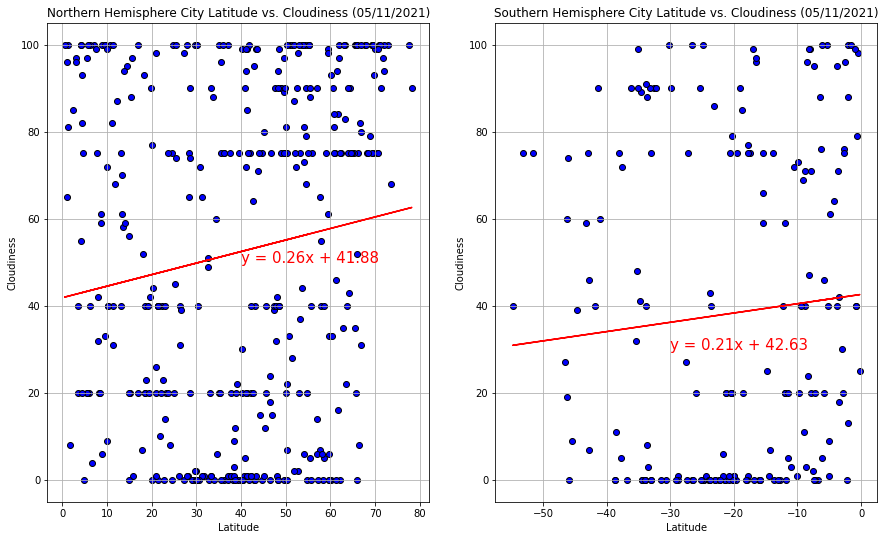

In [266]:
#Graph North and South Cloudiness versus latitude using multiple subplots
fig, (ax1, ax2) = plt.subplots(figsize = (13,8), nrows=1, ncols =2);
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")
ax2.scatter(x_axis2, y_axis2, marker="o", facecolors="blue", edgecolors="black")
fig.tight_layout(pad=4)
ax1.set_xlabel('Latitude');
ax1.set_ylabel('Cloudiness');
ax1.set_title("Northern Hemisphere City Latitude vs. Cloudiness (05/11/2021)");
ax2.set_xlabel('Latitude');
ax2.set_ylabel('Cloudiness');
ax2.set_title("Southern Hemisphere City Latitude vs. Cloudiness (05/11/2021)");
ax1.grid()
ax2.grid()
ax1.annotate(line_eq1,(40,50),fontsize=15,color="red");
ax2.annotate(line_eq2, (-30,30), fontsize=15, color="red");
ax1.plot(x_axis1,regress_values1,"r-");
ax2.plot(x_axis2,regress_values2,"r-");

Again, cloudiness does not seem to be correlated with latitude. The data is scattered all over the plot. 

####  Northern and Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [271]:
#Set Variables for North and South wind speed vs Latitude
x_axis1 = north_hemisphere['lat']
y_axis1 = north_hemisphere['wind_speed']
x_axis2 = south_hemisphere['lat']
y_axis2 = south_hemisphere['wind_speed']

In [282]:
#Linear regression Northern Hemisphere
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

#Linear regression Southern
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)
regress_values2 = x_axis2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
rvalue2 **2

0.0021331573801544874

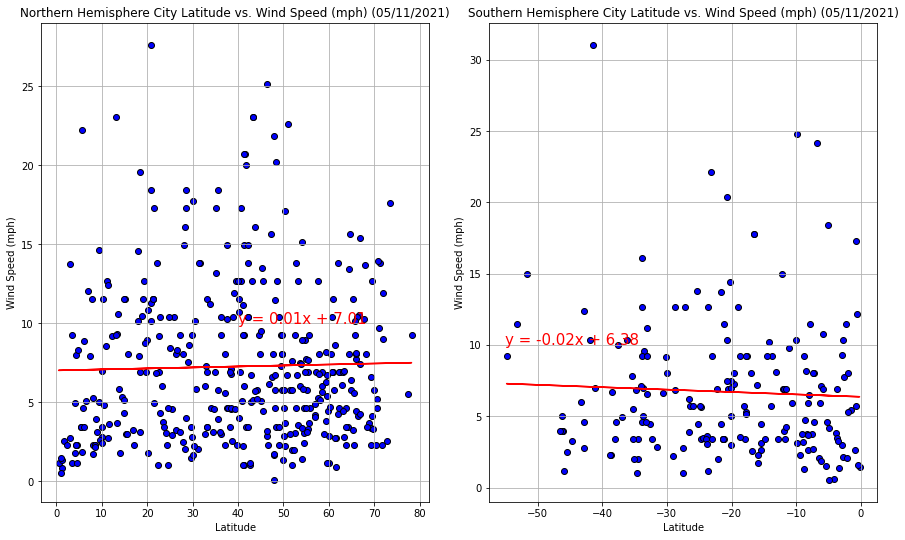

In [280]:
#Graph North and South wind speed versus latitude using multiple subplots
fig, (ax1, ax2) = plt.subplots(figsize = (13,8), nrows=1, ncols =2);
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")
ax2.scatter(x_axis2, y_axis2, marker="o", facecolors="blue", edgecolors="black")
fig.tight_layout(pad=4)
ax1.set_xlabel('Latitude');
ax1.set_ylabel('Wind Speed (mph)');
ax1.set_title("Northern Hemisphere City Latitude vs. Wind Speed (mph) (05/11/2021)");
ax2.set_xlabel('Latitude');
ax2.set_ylabel('Wind Speed (mph)');
ax2.set_title("Southern Hemisphere City Latitude vs. Wind Speed (mph) (05/11/2021)");
ax1.grid()
ax2.grid()
ax1.annotate(line_eq1,(40,10),fontsize=15,color="red");
ax2.annotate(line_eq2, (-55,10), fontsize=15, color="red");

ax1.plot(x_axis1,regress_values1,"r-");
ax2.plot(x_axis2,regress_values2,"r-");

Finally wind speed and latitude. There isn't much of a correlation here either. The wind speed regression seems slightly better able to predict the data, but that seems to be coincidence rather than that the model is good. 